In [8]:
import numpy as n
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
data.drop(['Species','Id'],axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
x = data.iloc[:, [0, 1, 2, 3]].values

In [18]:
from sklearn.cluster import KMeans

C:\Users\sandy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


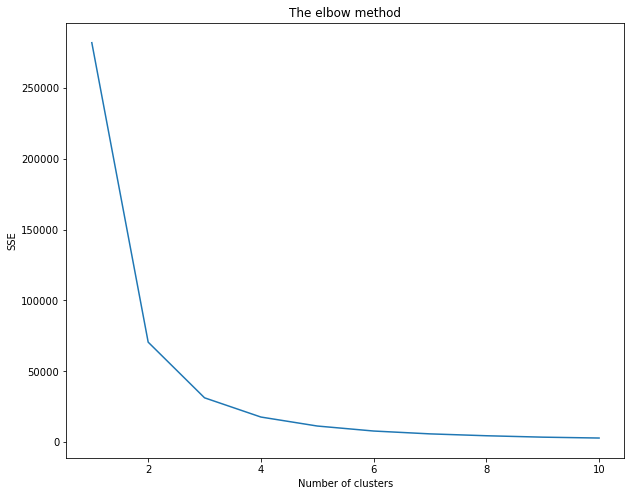

In [19]:
sse = []

for k in range(1,11):
    km = KMeans(n_clusters=k,max_iter=300,n_init=10,init = 'k-means++')
    km.fit(x)
    sse.append(km.inertia_)
    
plt.plot(range(1,11),sse)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [20]:
km = KMeans(n_clusters=3,max_iter=300,n_init=10)
y_kmeans = km.fit_predict(x)

In [21]:
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

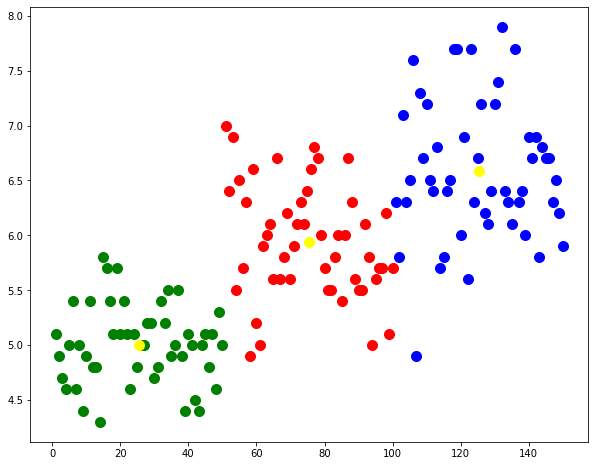

In [22]:
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1],s=100,c = 'red',label = 'Iris-setosa')

plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1],s=100,c = 'blue',label = 'Iris-versicolour')

plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1],s=100,c = 'green',label = 'Iris-virginica')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s=100,c='yellow',label='Centroids')

plt.rcParams["figure.figsize"]=10,8